# VirES - access to INTERMAGNET ground observatory data

This notebook demonstrates access to AUX_OBS observatory data via VirES for Swarm API.

Avalable collections

| Collection Name | Description |
|---|---|
| `SW_OPER_AUX_OBSM2_` | 1 minute data from all observatories |
| `SW_OPER_AUX_OBSM2_:<code>` | 1 minute data from a single selected observatory |
| `SW_OPER_AUX_OBSS2_` | 1 second data from all observatories |
| `SW_OPER_AUX_OBSS2_:<code>` | 1 second data from a single selected observatory  |
| `SW_OPER_AUX_OBSH2_` | 1 hour data from all observatories |
| `SW_OPER_AUX_OBSH2_:<code>` | 1 hour data from a single selected observatory  |

The `<code>` is a 3-letter [IAGA observatory code](http://www.wdc.bgs.ac.uk/catalog/obs_code.html).


Avalable variables (same for all collections)

| Variable | Unit | Dimension | Description | 
|---|---|---|---|
| `IAGA_code` | $-$ | char [3] | [IAGA observatory code](http://www.wdc.bgs.ac.uk/catalog/obs_code.html) |
| `Timestamp` | $-$ | scalar |UTC time of observation |
| `Latitude` | $\text{deg}$ | scalar | ITRF geocentric latitude |
| `Longitude` | $\text{deg}$ | scalar | ITRF geocentric longitude |
| `Radius` | $\text{m}$ | scalar | ITRF geocentric radius |
| `B_NEC` | $\text{nT}$ | vector [3] | Measured magnetic field vector in ITRF NEC frame. |
| `F` | $\text{nT}$ | scalar | Magnetic field intensity calculated from `B_NEC` |
| `Quality` | $-$ | char [1] |Data quality: `D` for definitive and `Q` for quasi-definitive |


In [1]:
from matplotlib.pyplot import figure, subplot, show
from viresclient import SwarmRequest

server_url = None # default VirES server

## 1 second observatory data - all


Accessing INTERMAGNET and/or WDC data
Check usage terms at ftp://ftp.nerc-murchison.ac.uk/geomag/Swarm/AUX_OBS/second/README


Accessing INTERMAGNET and/or WDC data
Check usage terms at ftp://ftp.nerc-murchison.ac.uk/geomag/Swarm/AUX_OBS/second/README

Avaiable observatories and temporal extent of their data:
IAGACode	startTime			endTime
AAE	2013-01-01T00:00:00+00:00	2013-10-31T23:59:59+00:00
ABK	2017-01-17T00:00:00+00:00	2021-03-16T23:59:59+00:00
BDV	2020-07-23T00:00:00+00:00	2021-04-11T23:59:59+00:00
BOX	2016-07-06T00:00:00+00:00	2021-01-31T23:59:59+00:00
CLF	2012-10-01T00:00:00+00:00	2021-01-31T23:59:59+00:00
CZT	2012-10-01T00:00:00+00:00	2014-09-30T23:59:59+00:00
DLT	2013-01-01T00:00:00+00:00	2021-01-31T23:59:59+00:00
DRV	2012-10-01T00:00:00+00:00	2014-09-30T23:59:59+00:00
EBR	2013-08-01T00:00:00+00:00	2021-02-28T23:59:59+00:00
IPM	2013-01-01T00:00:00+00:00	2017-11-30T23:59:59+00:00
KOU	2013-01-01T00:00:00+00:00	2021-01-31T23:59:59+00:00
LYC	2017-01-17T00:00:00+00:00	2021-03-16T23

Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (9.382MB)

<xarray.Dataset>
Dimensions:     (NEC: 3, Timestamp: 100800)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2016-01-01T10:00:00 ... 2016-01-01...
  * NEC         (NEC) <U1 'N' 'E' 'C'
Data variables:
    Spacecraft  (Timestamp) object '-' '-' '-' '-' '-' ... '-' '-' '-' '-' '-'
    Latitude    (Timestamp) float64 47.83 11.87 40.77 ... 5.175 14.3 22.65
    Longitude   (Timestamp) float64 2.26 108.5 0.333 250.6 ... 307.3 343.0 5.53
    F           (Timestamp) float64 4.782e+04 4.154e+04 ... 3.273e+04 3.778e+04
    QDLat       (Timestamp) float64 43.2 5.261 34.65 ... 7.507 3.007 12.69
    Quality     (Timestamp) <U1 'Q' 'Q' 'Q' 'Q' 'Q' 'Q' ... 'Q' 'Q' 'Q' 'Q' 'Q'
    Radius      (Timestamp) float64 6.367e+06 6.379e+06 ... 6.377e+06 6.376e+06
    MLT         (Timestamp) float64 10.65 17.46 10.47 ... 10.75 13.12 14.61
    B_NEC       (Timestamp, NEC) float64 2.101e+04 118.6 ... 57.26 1.718e+04
    IAGA_code   (Timestamp) <U3 'CLF' 'DLT' 'EBR' 'IPM' ... 'KOU' 'MBO' 'TAM'
    QDLon  

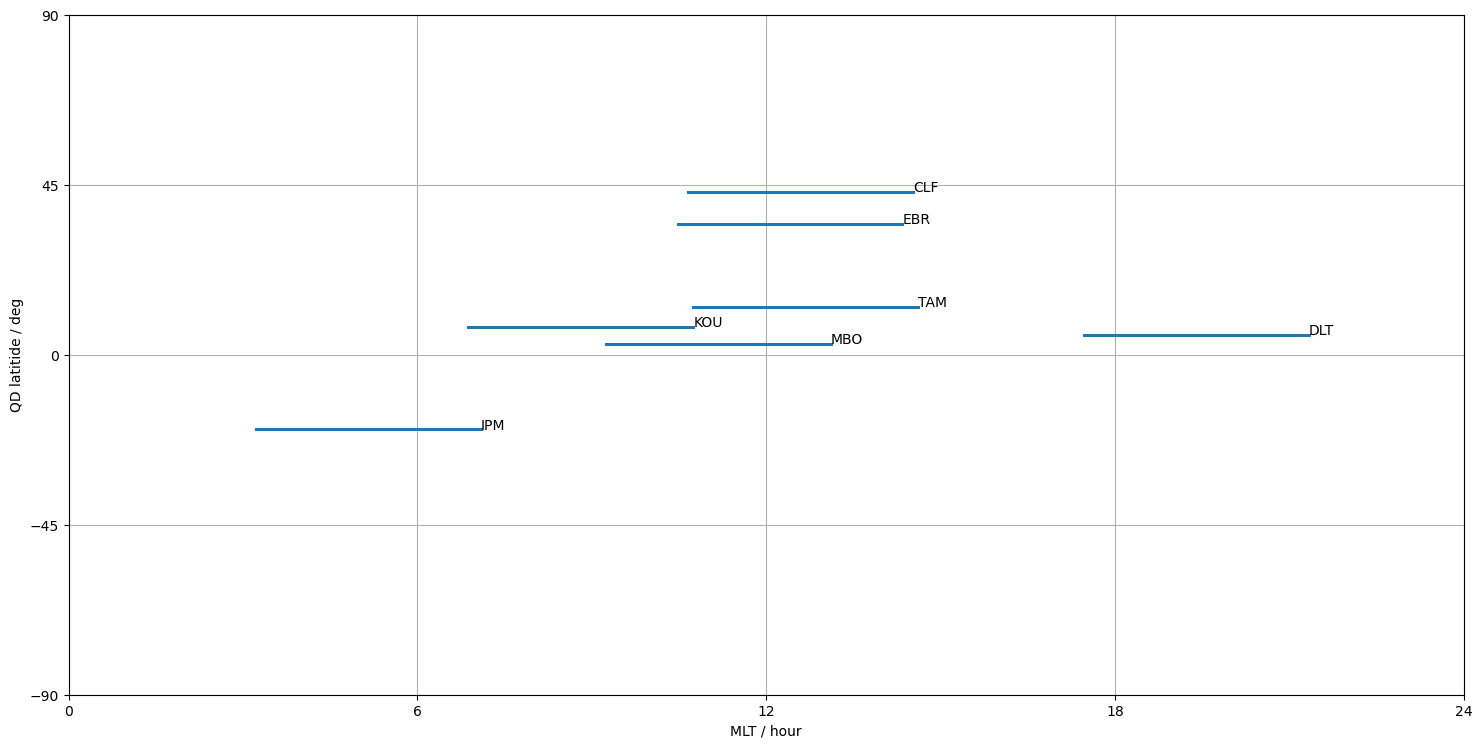

In [2]:
request = SwarmRequest(server_url)
request.set_collection('SW_OPER_AUX_OBSS2_')
request.set_products(
    measurements=['B_NEC', 'F', 'IAGA_code', 'Quality'],
    auxiliaries=['QDLat', 'QDLon', 'MLT'],
)

observatories = request.available_observatories('SW_OPER_AUX_OBSS2_', details=True)
print("Avaiable observatories and temporal extent of their data:")

# 'IAGACode' field name replaced by 'site' in newer version
key = 'IAGACode' if 'IAGACode' in observatories.keys() else 'site'

print('IAGACode\tstartTime\t\t\tendTime')
for item in zip(observatories[key], observatories['startTime'], observatories['endTime']):
    print("%s\t%s\t%s" % item)


data = request.get_between(
    start_time='2016-01-01T10:00:00Z',
    end_time='2016-01-01T14:00:00Z',
    asynchronous=False,
).as_xarray()

# ---------

print(data)

%matplotlib inline
fig = figure(figsize=(18, 9), dpi=100)
ax = subplot(1, 1, 1)

times = data['Timestamp'].values
idx = (times == times.max()).nonzero()[0]


ax.plot(data['MLT'].values, data['QDLat'].values, '.', ms=2)
ax.set_ylim([-90, 90])

for qdlat, mlt, code in zip(data['QDLat'].values[idx], data['MLT'].values[idx], data['IAGA_code'].values[idx]):
    ax.text(mlt, qdlat, code)

ax.set_yticks([-90, -45, 0, +45, 90])
ax.set_ylim([-90, 90])
ax.set_ylabel('QD latitide / deg')
ax.set_xticks([0, 6, 12, 18, 24])
ax.set_xlim([0, 24])
ax.set_xlabel('MLT / hour')
ax.grid()
show()

## 1 second observatory data - single sensor


Accessing INTERMAGNET and/or WDC data
Check usage terms at ftp://ftp.nerc-murchison.ac.uk/geomag/Swarm/AUX_OBS/second/README



Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (1.346MB)

<xarray.Dataset>
Dimensions:     (NEC: 3, Timestamp: 14400)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2016-01-01T10:00:00 ... 2016-01-01...
  * NEC         (NEC) <U1 'N' 'E' 'C'
Data variables:
    Spacecraft  (Timestamp) object '-' '-' '-' '-' '-' ... '-' '-' '-' '-' '-'
    Latitude    (Timestamp) float64 47.83 47.83 47.83 ... 47.83 47.83 47.83
    Longitude   (Timestamp) float64 2.26 2.26 2.26 2.26 ... 2.26 2.26 2.26 2.26
    F           (Timestamp) float64 4.782e+04 4.782e+04 ... 4.783e+04 4.783e+04
    QDLat       (Timestamp) float64 43.2 43.2 43.2 43.2 ... 43.2 43.2 43.2 43.2
    Quality     (Timestamp) <U1 'Q' 'Q' 'Q' 'Q' 'Q' 'Q' ... 'Q' 'Q' 'Q' 'Q' 'Q'
    Radius      (Timestamp) float64 6.367e+06 6.367e+06 ... 6.367e+06 6.367e+06
    MLT         (Timestamp) float64 10.65 10.65 10.66 ... 14.52 14.53 14.53
    B_NEC       (Timestamp, NEC) float64 2.101e+04 118.6 ... 103.0 4.296e+04
    IAGA_code   (Timestamp) <U3 'CLF' 'CLF' 'CLF' 'CLF' ... 'CLF' 'CLF' 'CLF'
    QD

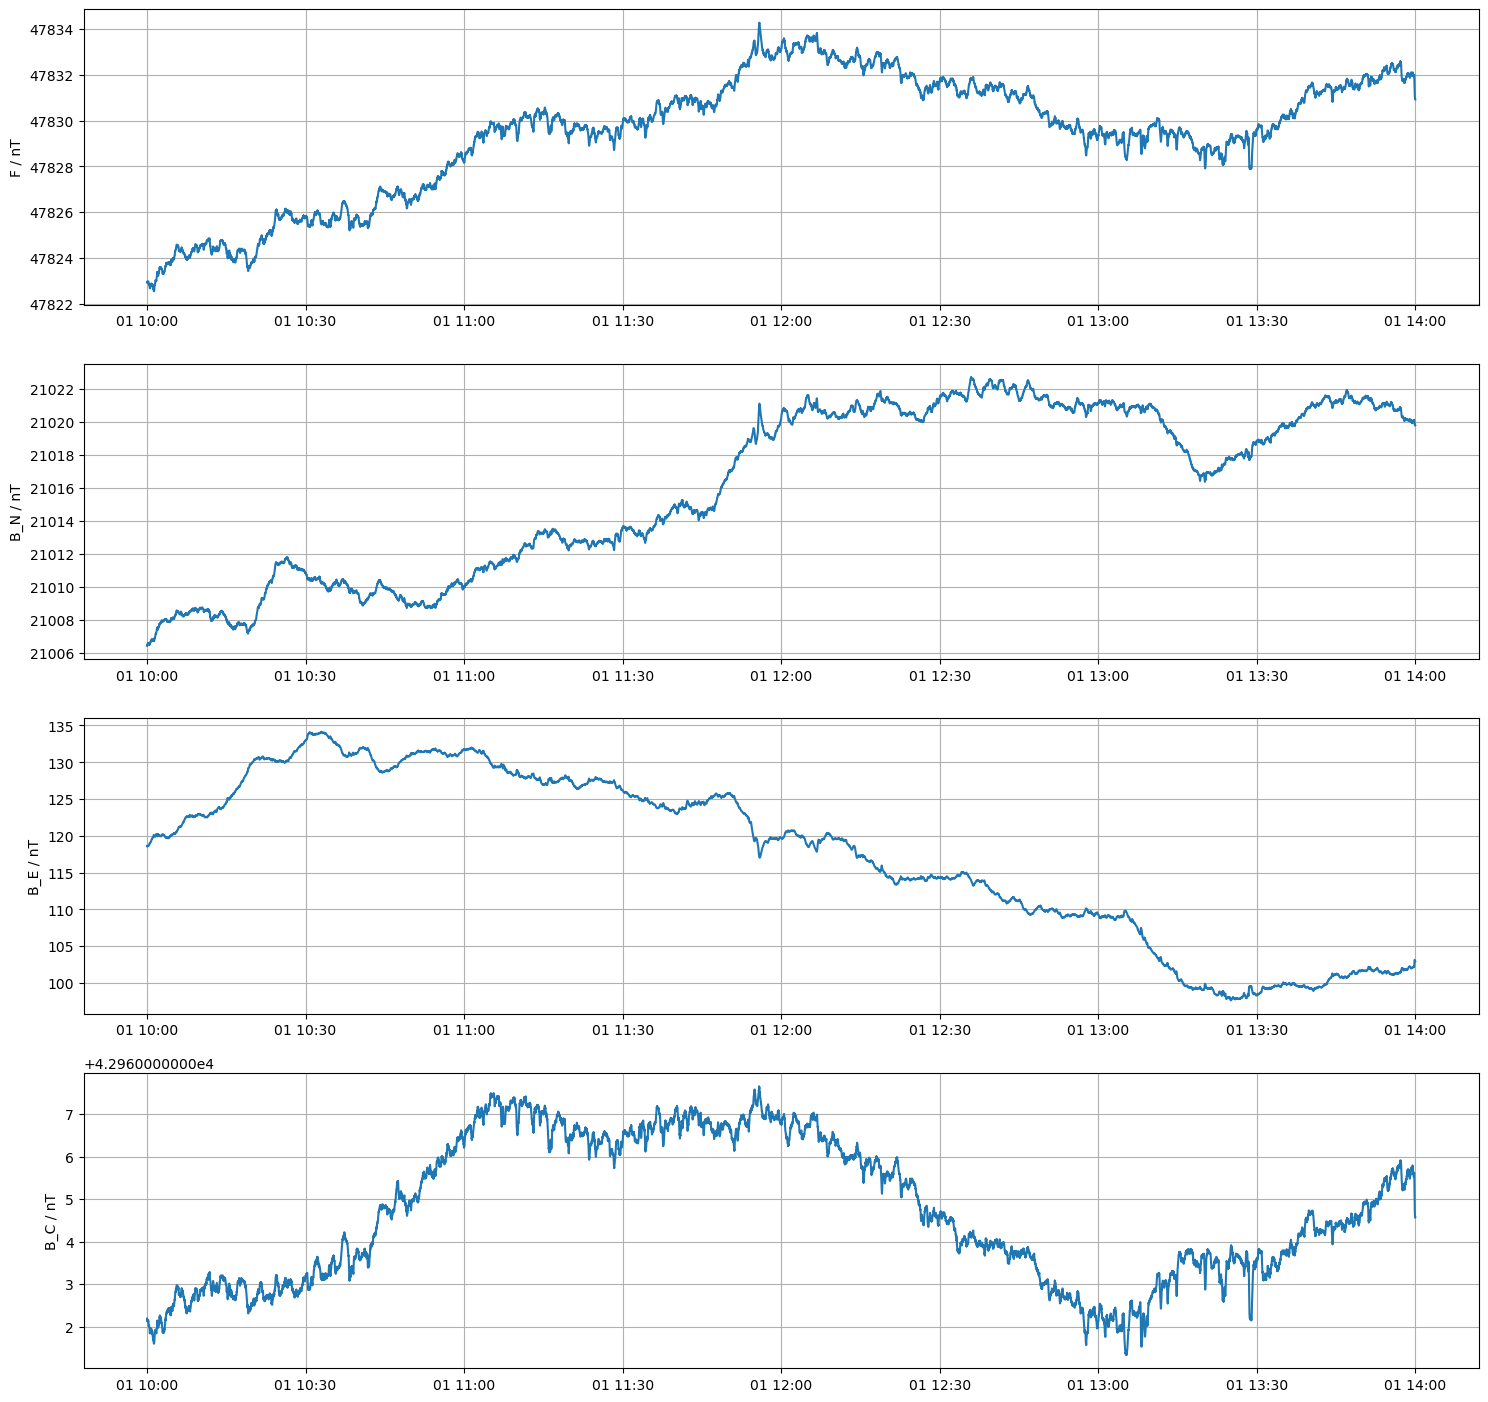

In [3]:
request = SwarmRequest(server_url)
request.set_collection('SW_OPER_AUX_OBSS2_:CLF')
request.set_products(
    measurements=['B_NEC', 'F', 'IAGA_code', 'Quality'],
    auxiliaries=['QDLat', 'QDLon', 'MLT'],
)

data = request.get_between(
    start_time='2016-01-01T10:00:00Z',
    end_time='2016-01-01T14:00:00Z',
    asynchronous=False,
).as_xarray()

# ---------

print(data)

%matplotlib inline
fig = figure(figsize=(18, 18), dpi=100)

ax = subplot(4, 1, 1)
ax.plot(data['Timestamp'].values, data['F'].values, '-')
ax.set_ylabel('F / nT')
ax.grid()

ax = subplot(4, 1, 2)
ax.plot(data['Timestamp'].values, data['B_NEC'].values[:, 0], '-')
ax.set_ylabel('B_N / nT')
ax.grid()

ax = subplot(4, 1, 3)
ax.plot(data['Timestamp'].values, data['B_NEC'].values[:, 1], '-')
ax.set_ylabel('B_E / nT')
ax.grid()

ax = subplot(4, 1, 4)
ax.plot(data['Timestamp'].values, data['B_NEC'].values[:, 2], '-')
ax.set_ylabel('B_C / nT')
ax.grid()

show()

## 1 minute observatory data - all


Accessing INTERMAGNET and/or WDC data
Check usage terms at ftp://ftp.nerc-murchison.ac.uk/geomag/Swarm/AUX_OBS/minute/README


Accessing INTERMAGNET and/or WDC data
Check usage terms at ftp://ftp.nerc-murchison.ac.uk/geomag/Swarm/AUX_OBS/minute/README

Avaiable observatories and temporal extent of their data:
IAGACode	startTime			endTime
AAA	2005-01-01T00:00:00+00:00	2015-12-31T23:59:00+00:00
AAE	1998-01-01T00:00:00+00:00	2013-12-31T23:59:00+00:00
ABG	1997-01-02T00:00:00+00:00	2020-12-31T23:59:00+00:00
ABK	1997-01-02T00:00:00+00:00	2021-03-16T23:59:00+00:00
AIA	2004-01-01T00:00:00+00:00	2015-12-08T23:59:00+00:00
ALE	1997-01-02T00:00:00+00:00	2002-12-31T23:59:00+00:00
AMS	1997-01-02T00:00:00+00:00	2013-12-31T23:59:00+00:00
API	1999-01-01T00:00:00+00:00	2018-12-31T23:59:00+00:00
AQU	2000-06-01T00:00:00+00:00	2009-12-31T23:59:00+00:00
ARS	2014-01-01T00:00:00+00:00	2021-01-15T23:59:00+00:00
ASC	2003-01-01T00:00:00+00:00	2021-03-16T23:59:00+00:00
ASP	1999-01-01T00:00:00+00:00	2021-02-28T23

Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (2.306MB)

<xarray.Dataset>
Dimensions:     (NEC: 3, Timestamp: 24720)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2016-01-01T10:00:00 ... 2016-01-01...
  * NEC         (NEC) <U1 'N' 'E' 'C'
Data variables:
    Spacecraft  (Timestamp) object '-' '-' '-' '-' '-' ... '-' '-' '-' '-' '-'
    Latitude    (Timestamp) float64 18.5 68.23 -13.73 ... -22.26 47.74 53.56
    Longitude   (Timestamp) float64 72.87 18.82 171.8 58.6 ... 316.4 15.86 9.073
    F           (Timestamp) float64 4.296e+04 5.319e+04 ... 4.85e+04 4.963e+04
    QDLat       (Timestamp) float64 12.57 65.39 -18.52 ... -20.53 43.03 49.75
    Quality     (Timestamp) <U1 'D' 'D' 'D' 'Q' 'D' 'D' ... 'D' 'D' 'Q' 'D' 'D'
    Radius      (Timestamp) float64 6.376e+06 6.36e+06 ... 6.367e+06 6.364e+06
    MLT         (Timestamp) float64 15.12 12.08 21.85 ... 10.73 15.29 14.98
    B_NEC       (Timestamp, NEC) float64 3.803e+04 180.0 ... 752.9 4.624e+04
    IAGA_code   (Timestamp) <U3 'ABG' 'ABK' 'API' 'ARS' ... 'VSS' 'WIC' 'WNG'
    QDLo

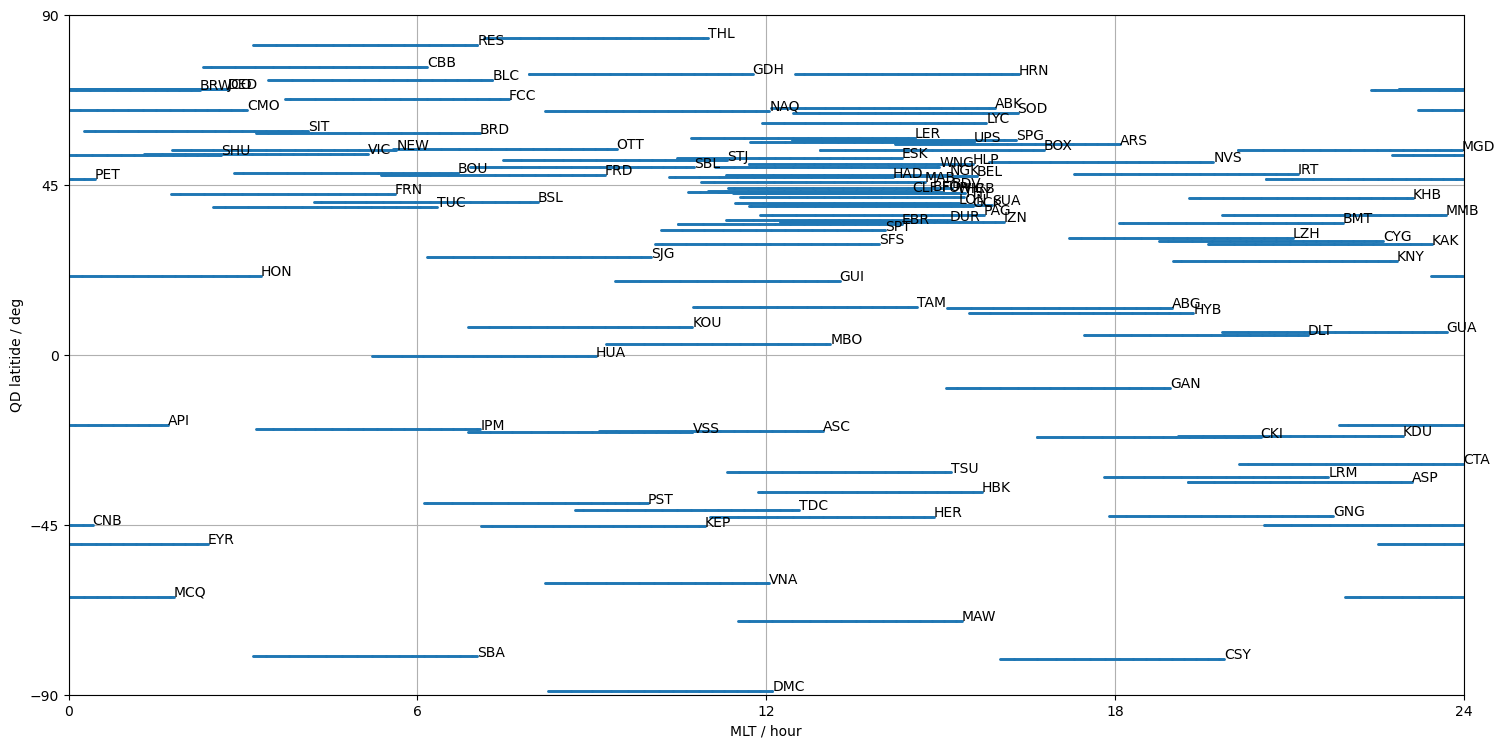

In [4]:
request = SwarmRequest(server_url)
request.set_collection('SW_OPER_AUX_OBSM2_')
request.set_products(
    measurements=['B_NEC', 'F', 'IAGA_code', 'Quality'],
    auxiliaries=['QDLat', 'QDLon', 'MLT'],
)

observatories = request.available_observatories('SW_OPER_AUX_OBSM2_', details=True)

# 'IAGACode' field name replaced by 'site' in newer version
key = 'IAGACode' if 'IAGACode' in observatories.keys() else 'site'

print("Avaiable observatories and temporal extent of their data:")
print('IAGACode\tstartTime\t\t\tendTime')
for item in zip(observatories[key], observatories['startTime'], observatories['endTime']):
    print("%s\t%s\t%s" % item)

data = request.get_between(
    start_time='2016-01-01T10:00:00Z',
    end_time='2016-01-01T14:00:00Z',
    asynchronous=False,
).as_xarray()

# ---------

print(data)

%matplotlib inline
fig = figure(figsize=(18, 9), dpi=100)
ax = subplot(1, 1, 1)

times = data['Timestamp'].values
idx = (times == times.max()).nonzero()[0]


ax.plot(data['MLT'].values, data['QDLat'].values, '.', ms=2)
ax.set_ylim([-90, 90])

for qdlat, mlt, code in zip(data['QDLat'].values[idx], data['MLT'].values[idx], data['IAGA_code'].values[idx]):
    ax.text(mlt, qdlat, code)

ax.set_yticks([-90, -45, 0, +45, 90])
ax.set_ylim([-90, 90])
ax.set_ylabel('QD latitide / deg')
ax.set_xticks([0, 6, 12, 18, 24])
ax.set_xlim([0, 24])
ax.set_xlabel('MLT / hour')
ax.grid()
show()

## 1 minute observatory data - single sensor


Accessing INTERMAGNET and/or WDC data
Check usage terms at ftp://ftp.nerc-murchison.ac.uk/geomag/Swarm/AUX_OBS/minute/README



Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (0.105MB)

<xarray.Dataset>
Dimensions:     (NEC: 3, Timestamp: 240)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2016-01-01T10:00:00 ... 2016-01-01...
  * NEC         (NEC) <U1 'N' 'E' 'C'
Data variables:
    Spacecraft  (Timestamp) object '-' '-' '-' '-' '-' ... '-' '-' '-' '-' '-'
    Latitude    (Timestamp) float64 47.83 47.83 47.83 ... 47.83 47.83 47.83
    Longitude   (Timestamp) float64 2.26 2.26 2.26 2.26 ... 2.26 2.26 2.26 2.26
    F           (Timestamp) float64 4.782e+04 4.782e+04 ... 4.783e+04 4.783e+04
    QDLat       (Timestamp) float64 43.2 43.2 43.2 43.2 ... 43.2 43.2 43.2 43.2
    Quality     (Timestamp) <U1 'D' 'D' 'D' 'D' 'D' 'D' ... 'D' 'D' 'D' 'D' 'D'
    Radius      (Timestamp) float64 6.367e+06 6.367e+06 ... 6.367e+06 6.367e+06
    MLT         (Timestamp) float64 10.65 10.67 10.69 10.7 ... 14.48 14.49 14.51
    B_NEC       (Timestamp, NEC) float64 2.101e+04 118.7 ... 102.2 4.297e+04
    IAGA_code   (Timestamp) <U3 'CLF' 'CLF' 'CLF' 'CLF' ... 'CLF' 'CLF' 'CLF'
   

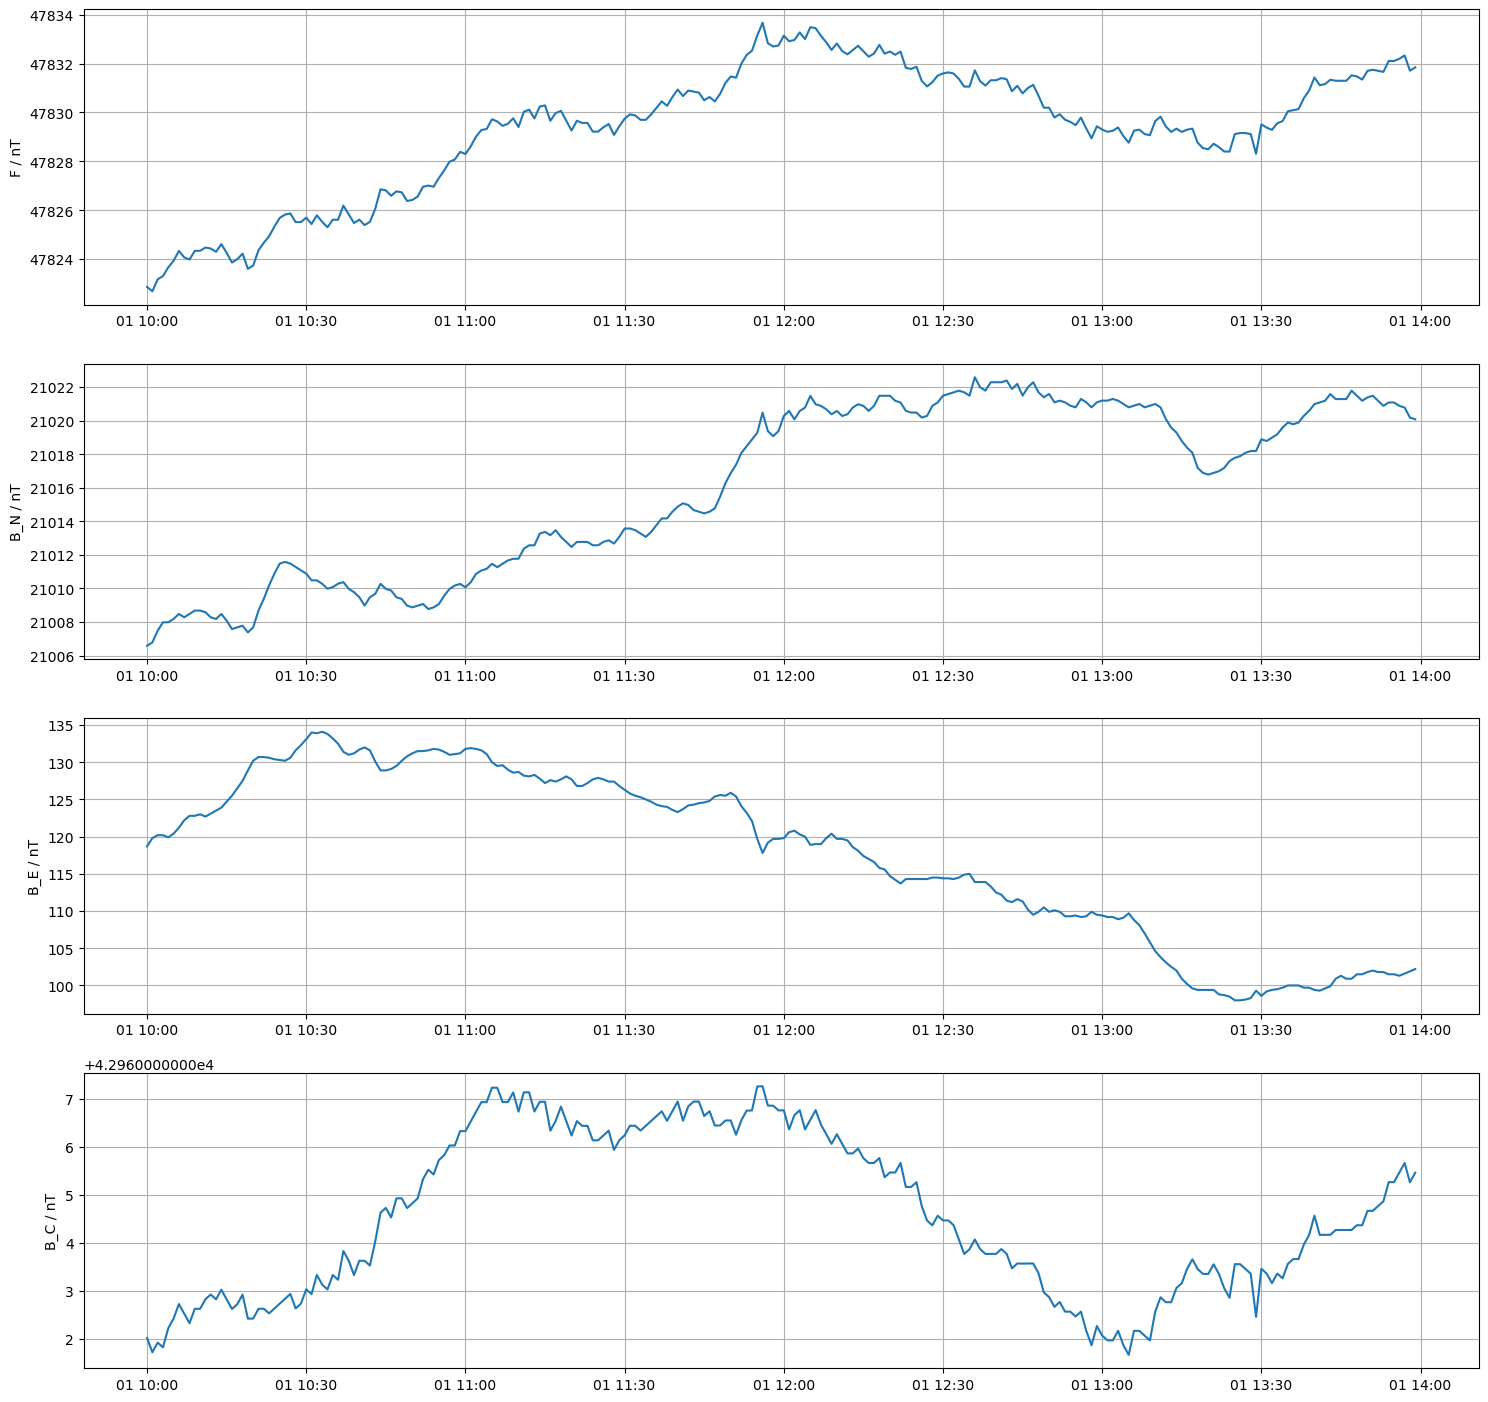

In [5]:
request = SwarmRequest(server_url)
request.set_collection('SW_OPER_AUX_OBSM2_:CLF')
request.set_products(
    measurements=['B_NEC', 'F', 'IAGA_code', 'Quality'],
    auxiliaries=['QDLat', 'QDLon', 'MLT'],
)

data = request.get_between(
    start_time='2016-01-01T10:00:00Z',
    end_time='2016-01-01T14:00:00Z',
    asynchronous=False,
).as_xarray()

# ---------

print(data)

%matplotlib inline
fig = figure(figsize=(18, 18), dpi=100)
ax = subplot(4, 1, 1)
ax.plot(data['Timestamp'].values, data['F'].values, '-')
ax.set_ylabel('F / nT')
ax.grid()

ax = subplot(4, 1, 2)
ax.plot(data['Timestamp'].values, data['B_NEC'].values[:, 0], '-')
ax.set_ylabel('B_N / nT')
ax.grid()

ax = subplot(4, 1, 3)
ax.plot(data['Timestamp'].values, data['B_NEC'].values[:, 1], '-')
ax.set_ylabel('B_E / nT')
ax.grid()

ax = subplot(4, 1, 4)
ax.plot(data['Timestamp'].values, data['B_NEC'].values[:, 2], '-')
ax.set_ylabel('B_C / nT')
ax.grid()

show()

## 1 hour observatory data - all


Accessing INTERMAGNET and/or WDC data
Check usage terms at ftp://ftp.nerc-murchison.ac.uk/geomag/Swarm/AUX_OBS/hour/README


Accessing INTERMAGNET and/or WDC data
Check usage terms at ftp://ftp.nerc-murchison.ac.uk/geomag/Swarm/AUX_OBS/hour/README

Avaiable observatories and temporal extent of their data:
IAGACode	startTime			endTime
AAA	1963-05-01T09:30:00+00:00	2015-06-17T22:30:00+00:00
AAE	1958-01-15T09:30:00+00:00	2013-12-31T23:30:00+00:00
ABG	1923-01-01T00:30:00+00:00	2019-12-31T23:30:00+00:00
ABK	1951-01-01T00:30:00+00:00	2020-12-31T23:30:00+00:00
ABN	1926-01-01T00:30:00+00:00	1956-12-31T23:30:00+00:00
AGN	1932-01-01T00:30:00+00:00	1969-03-31T23:30:00+00:00
AIA	1957-03-15T00:30:00+00:00	2017-12-31T23:30:00+00:00
ALE	1963-01-01T00:30:00+00:00	2004-12-31T23:30:00+00:00
AMS	1981-04-24T07:30:00+00:00	2013-12-31T23:30:00+00:00
AMT	1987-01-01T00:30:00+00:00	2000-12-31T23:30:00+00:00
API	1965-01-01T00:30:00+00:00	2018-12-31T23:30:00+00:00
AQU	1960-01-01T00:30:00+00:00	2009-12-31T23:30:

Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (0.118MB)

<xarray.Dataset>
Dimensions:     (NEC: 3, Timestamp: 524)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2016-01-01T10:30:00 ... 2016-01-01...
  * NEC         (NEC) <U1 'N' 'E' 'C'
Data variables:
    Spacecraft  (Timestamp) object '-' '-' '-' '-' '-' ... '-' '-' '-' '-' '-'
    ObsIndex    (Timestamp) uint8 1 0 0 2 0 0 0 0 0 0 1 ... 2 0 0 0 0 2 0 0 0 0
    Latitude    (Timestamp) float64 18.52 68.22 -65.1 ... 30.36 47.74 53.57
    Longitude   (Timestamp) float64 72.87 18.82 295.8 ... 114.6 15.87 9.067
    F           (Timestamp) float64 4.297e+04 5.319e+04 ... 4.85e+04 4.962e+04
    QDLat       (Timestamp) float64 12.59 65.38 -50.94 ... 24.92 43.04 49.76
    Quality     (Timestamp) <U1 'Q' 'Q' 'Q' 'Q' 'Q' 'Q' ... 'Q' 'Q' 'Q' 'Q' 'Q'
    Radius      (Timestamp) float64 6.376e+06 6.36e+06 ... 6.367e+06 6.364e+06
    MLT         (Timestamp) float64 15.61 12.58 6.519 ... 21.31 14.83 14.52
    B_NEC       (Timestamp, NEC) float64 3.803e+04 182.0 ... 751.0 4.624e+04
    IAGA_code  

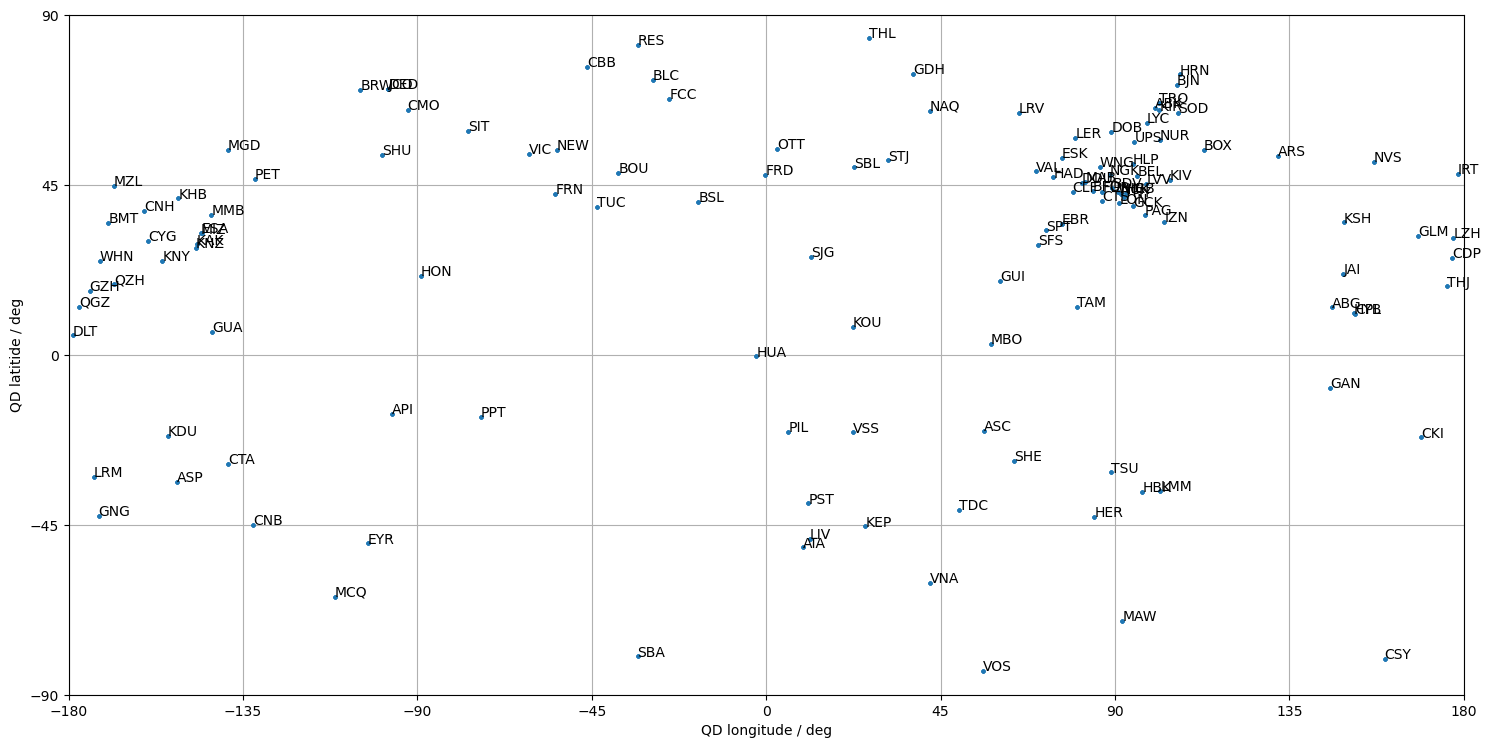

In [6]:
request = SwarmRequest(server_url)
request.set_collection('SW_OPER_AUX_OBSH2_')
request.set_products(
    measurements=['B_NEC', 'F', 'IAGA_code', 'ObsIndex', 'Quality'],
    auxiliaries=['QDLat', 'QDLon', 'MLT'],
)

observatories = request.available_observatories('SW_OPER_AUX_OBSH2_', details=True)

print("Avaiable observatories and temporal extent of their data:")
print('IAGACode\tstartTime\t\t\tendTime')
for item in zip(observatories['site'], observatories['startTime'], observatories['endTime']):
    print("%s\t%s\t%s" % item)

data = request.get_between(
    start_time='2016-01-01T10:00:00Z',
    end_time='2016-01-01T14:00:00Z',
    asynchronous=False,
).as_xarray()

# ---------

print(data)

%matplotlib inline
fig = figure(figsize=(18, 9), dpi=100)
ax = subplot(1, 1, 1)

times = data['Timestamp'].values
idx = (times == times.max()).nonzero()[0]


ax.plot(data['QDLon'].values, data['QDLat'].values, '.', ms=4)
ax.set_ylim([-90, 90])

for qdlat, mlt, code in zip(data['QDLat'].values[idx], data['QDLon'].values[idx], data['IAGA_code'].values[idx]):
    ax.text(mlt, qdlat, code)

ax.set_yticks([-90, -45, 0, +45, +90])
ax.set_ylim([-90, 90])
ax.set_ylabel('QD latitide / deg')
ax.set_xticks([-180, -135, -90, -45, 0, +45, +90, +135, +180])
ax.set_xlim([-180, 180])
ax.set_xlabel('QD longitude / deg')
ax.grid()
show()

## 1 hour observatory data - single sensor


Accessing INTERMAGNET and/or WDC data
Check usage terms at ftp://ftp.nerc-murchison.ac.uk/geomag/Swarm/AUX_OBS/hour/README



Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (0.114MB)

<xarray.Dataset>
Dimensions:     (NEC: 3, Timestamp: 24)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2016-01-01T00:30:00 ... 2016-01-01...
  * NEC         (NEC) <U1 'N' 'E' 'C'
Data variables:
    Spacecraft  (Timestamp) object '-' '-' '-' '-' '-' ... '-' '-' '-' '-' '-'
    ObsIndex    (Timestamp) uint8 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    Latitude    (Timestamp) float64 47.83 47.83 47.83 ... 47.83 47.83 47.83
    Longitude   (Timestamp) float64 2.267 2.267 2.267 ... 2.267 2.267 2.267
    F           (Timestamp) float64 4.783e+04 4.784e+04 ... 4.785e+04 4.784e+04
    QDLat       (Timestamp) float64 43.19 43.19 43.19 ... 43.19 43.19 43.19
    Quality     (Timestamp) <U1 'Q' 'Q' 'Q' 'Q' 'Q' 'Q' ... 'Q' 'Q' 'Q' 'Q' 'Q'
    Radius      (Timestamp) float64 6.367e+06 6.367e+06 ... 6.367e+06 6.367e+06
    MLT         (Timestamp) float64 0.6007 1.627 2.678 ... 21.64 22.61 23.59
    B_NEC       (Timestamp, NEC) float64 2.099e+04 206.0 ... 126.0 4.297e+04
    IAGA_code 

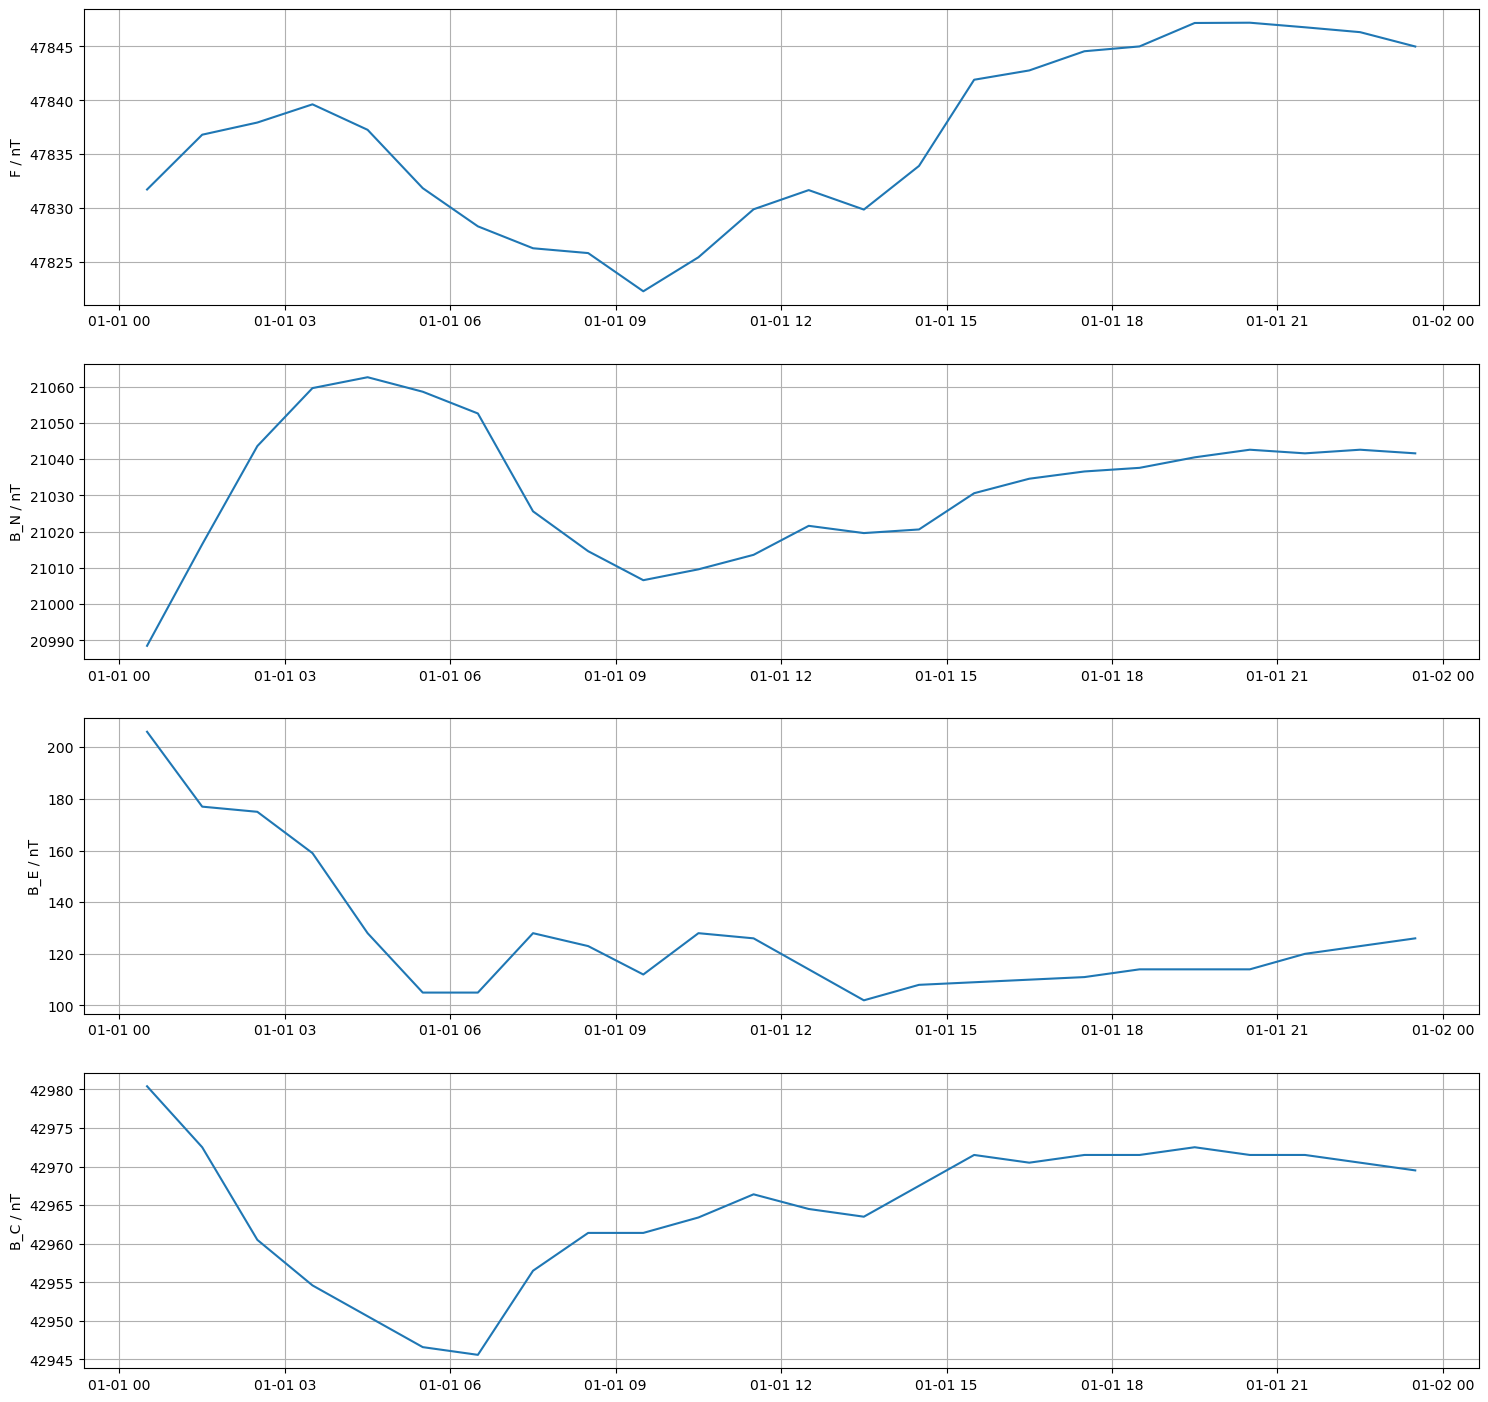

In [7]:
request = SwarmRequest(server_url)
request.set_collection('SW_OPER_AUX_OBSH2_:CLF')
request.set_products(
    measurements=['B_NEC', 'F', 'IAGA_code', 'ObsIndex', 'Quality'],
    auxiliaries=['QDLat', 'QDLon', 'MLT'],
)

data = request.get_between(
    start_time='2016-01-01T00:00:00Z',
    end_time='2016-01-02T00:00:00Z',
    asynchronous=False,
).as_xarray()

# ---------

print(data)

%matplotlib inline
fig = figure(figsize=(18, 18), dpi=100)
ax = subplot(4, 1, 1)
ax.plot(data['Timestamp'].values, data['F'].values, '-')
ax.set_ylabel('F / nT')
ax.grid()

ax = subplot(4, 1, 2)
ax.plot(data['Timestamp'].values, data['B_NEC'].values[:, 0], '-')
ax.set_ylabel('B_N / nT')
ax.grid()

ax = subplot(4, 1, 3)
ax.plot(data['Timestamp'].values, data['B_NEC'].values[:, 1], '-')
ax.set_ylabel('B_E / nT')
ax.grid()

ax = subplot(4, 1, 4)
ax.plot(data['Timestamp'].values, data['B_NEC'].values[:, 2], '-')
ax.set_ylabel('B_C / nT')
ax.grid()

show()